In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Project Details

## In this file task are:
- Find out most successfull consols based on amount of sold excusive game copies (based on this database, I did found some games that are not exclusives, but there is no data about sales on other platforms)
- visualize the results

In [2]:
games = pd.read_csv('vgsales_cleared.csv')

In [3]:
games_copy = games.copy()
games_copy.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,1,Wii,2006,Sports,Nintendo,41.50,29.02,3.77,8.46,82.75
1,Super Mario Bros.,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.25
2,Mario Kart Wii,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.80
3,Wii Sports Resort,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


In [4]:
exclusives = games_copy.drop_duplicates(subset='Name', keep= False)
exclusives.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,1,Wii,2006,Sports,Nintendo,41.50,29.02,3.77,8.46,82.75
2,Mario Kart Wii,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.80
3,Wii Sports Resort,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
6,New Super Mario Bros.,7,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.02


In [5]:
#taking top 10 consols
top_10_exclusives = exclusives.pivot_table(index='Platform', values='Global_Sales', aggfunc='sum').sort_values(by='Global_Sales', ascending=False)[:10]
top_10_exclusives

,Global_Sales
Platform,
DS,621.66
Wii,564.21
PS,534.30
PS2,448.84
GBA,225.79
3DS,196.72
GB,191.72
X360,177.66
PSP,160.22


Text(0.5, 1.0, 'Top 10 platfroms based on exclusives sales')

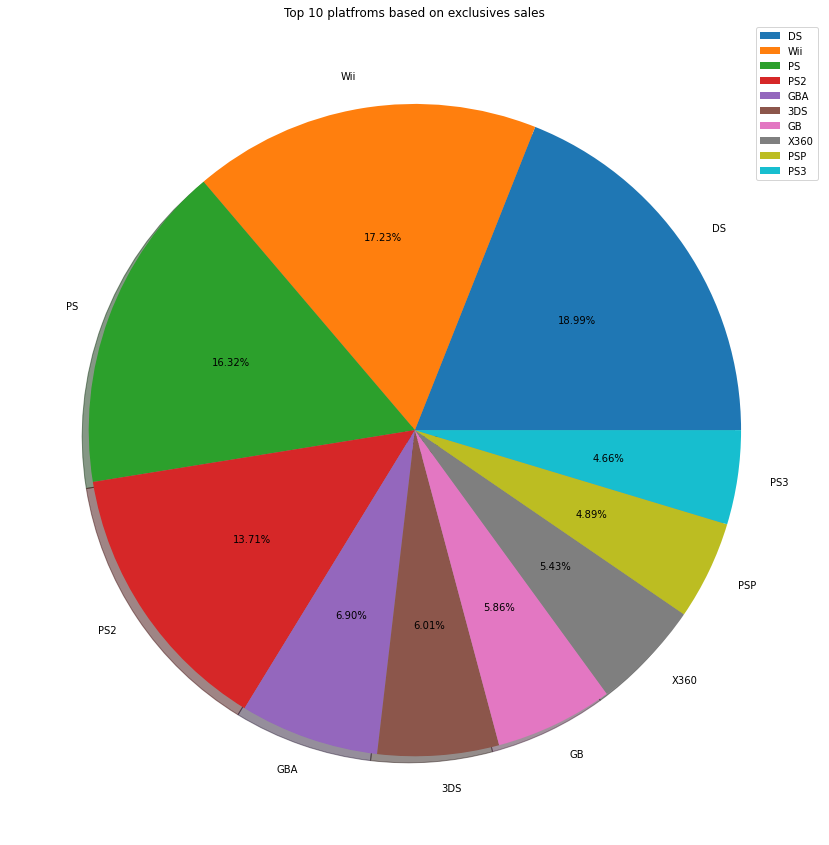

In [6]:
plt.figure(figsize=(15, 15))
plt.pie(top_10_exclusives.Global_Sales, labels=top_10_exclusives.index, autopct='%.2f%%', shadow = True)
plt.legend()
plt.title('Top 10 platfroms based on exclusives sales')

Of course, the amount of sold exclusives, is not equal to how much copies of console has been sold. However, there is interesting inside that can be read from this chart.

In [7]:
top_platforms = exclusives[exclusives['Platform'].isin(top_10_exclusives.index)]
top_platforms.head()

,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,1,Wii,2006,Sports,Nintendo,41.50,29.02,3.77,8.46,82.75
2,Mario Kart Wii,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.80
3,Wii Sports Resort,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
6,New Super Mario Bros.,7,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.02


In [9]:
top_platforms.Platform.loc[top_platforms.Publisher == "Nintendo"] = 'Nintendo Console'
top_platforms

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Name,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,1,Nintendo Console,2006,Sports,Nintendo,41.50,29.02,3.77,8.46,82.75
2,Mario Kart Wii,3,Nintendo Console,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.80
3,Wii Sports Resort,4,Nintendo Console,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,5,Nintendo Console,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
6,New Super Mario Bros.,7,Nintendo Console,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.02
...,...,...,...,...,...,...,...,...,...,...,...
16317,Mega Brain Boost,16591,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16319,Eiyuu Densetsu: Sora no Kiseki Material Collec...,16593,PSP,2007,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01
16321,Plushees,16595,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16322,Woody Woodpecker in Crazy Castle 5,16596,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
